In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("./data/data.csv")


In [13]:
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


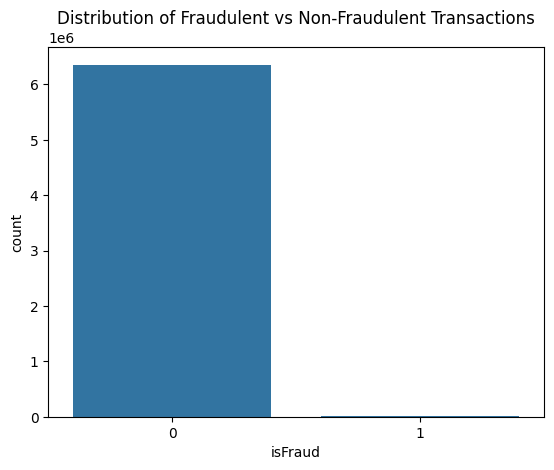

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()


In [14]:
print(data['type'].value_counts())
print(data['isFraud'].value_counts())




type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [15]:
data['hour'] = data['step'] % 24
data['balance_change'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['high_amount'] = data['amount'] > 200000  # Example threshold



In [16]:
data = pd.get_dummies(data, columns=['type'], drop_first=True)



In [24]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier with class weights


In [23]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.2 MB/s eta 0:00:00a 0:00:01


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.83      0.90      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.92      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270888      16]
 [    269    1351]]


In [28]:
import joblib
joblib.dump(model, 'fraud_model.pkl')


['fraud_model.pkl']